In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style = 'whitegrid')
current_palette = sns.color_palette("Paired")
sns.set_palette(current_palette)
vehicle_df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [3]:
vehicle_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
vehicle_df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [ ]:
vehicle_df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [4]:
vehicle_df.drop(columns=['car'], inplace=True)

In [ ]:
values = {'col':[],'unique':[]}

for col in vehicle_df.columns:
    values['col'].append(col)
    values['unique'].append(vehicle_df[col].unique())

values = pd.DataFrame(values)

values

,col,unique
0,destination,"[No Urgent Place, Home, Work]"
1,passanger,"[Alone, Friend(s), Kid(s), Partner]"
2,weather,"[Sunny, Rainy, Snowy]"
3,temperature,"[55, 80, 30]"
4,time,"[2PM, 10AM, 6PM, 7AM, 10PM]"
5,coupon,"[Restaurant(<20), Coffee House, Carry out & Ta..."
6,expiration,"[1d, 2h]"
7,gender,"[Female, Male]"
8,age,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
9,maritalStatus,"[Unmarried partner, Single, Married partner, D..."


In [5]:
# Drop column since there is only one unique value
vehicle_df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

In [6]:
vehicle_df.rename(columns={'passanger': 'passenger', 'maritalStatus': 'marital_status', 'CarryAway': 'CarryOut', 'Y': 'target'}, inplace = True)

Text(0.5, 1.0, 'Target Class')

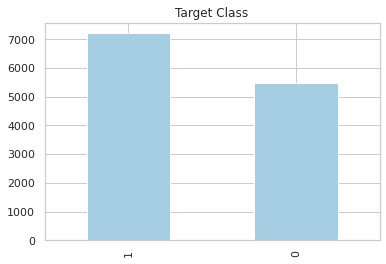

In [7]:
vehicle_df.target.value_counts().plot(kind='bar')
plt.title('Target Class')

In [8]:
# Drop column, redundant
vehicle_df.drop(columns=['direction_opp'], inplace=True)

Text(0.5, 1.0, 'Bar Value Counts')

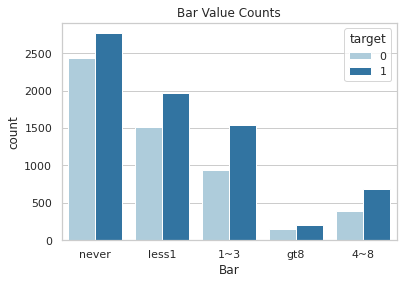

In [9]:
sns.countplot(x='Bar',data=vehicle_df,hue='target')
plt.title("Bar Value Counts")

Text(0.5, 1.0, 'CoffeeHouse Value Counts')

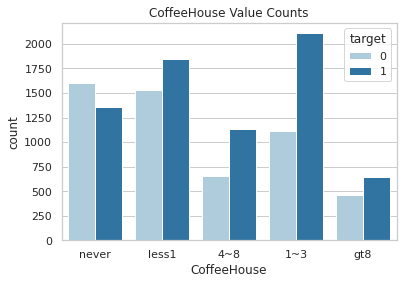

In [ ]:
sns.countplot(x='CoffeeHouse',data=vehicle_df,hue='target')
plt.title("CoffeeHouse Value Counts")

Text(0.5, 1.0, 'CarryOut Value Counts')

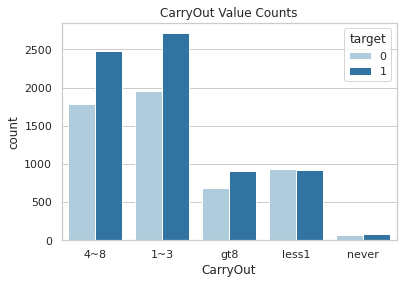

In [ ]:
sns.countplot(x='CarryOut',data=vehicle_df,hue='target')
plt.title("CarryOut Value Counts")

In [ ]:
vehicle_df['education'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [ ]:
vehicle_df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

Text(0.5, 1.0, 'Occupation Values Count')

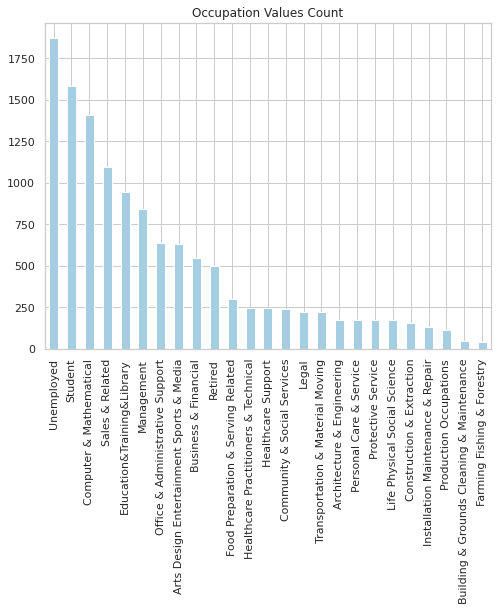

In [ ]:
plt.figure(figsize=(8,6))

vehicle_df.occupation.value_counts().plot(kind='bar')
plt.title('Occupation Values Count')

In [ ]:
target_yes = vehicle_df[vehicle_df['target']==1] 
target_no = vehicle_df[vehicle_df['target']==0] 

Text(0.5, 1.0, 'Coupon used by Occupation')

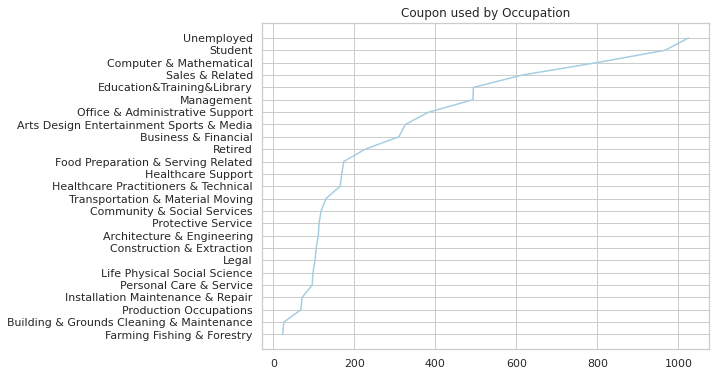

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(y=target_yes['occupation'].value_counts().to_dict().keys(),x=target_yes['occupation'].value_counts().to_dict().values())

plt.title('Coupon used by Occupation')

Text(0.5, 1.0, 'Education Values Count')

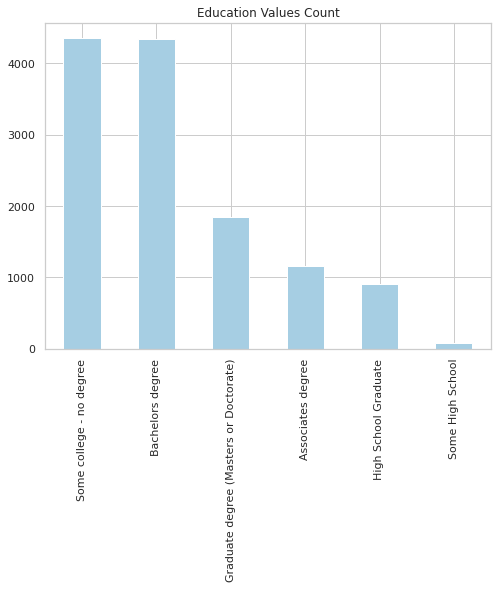

In [ ]:
plt.figure(figsize=(8,6))

vehicle_df.education.value_counts().plot(kind='bar')
plt.title('Education Values Count')

Text(0.5, 1.0, 'Coupon used by Education')

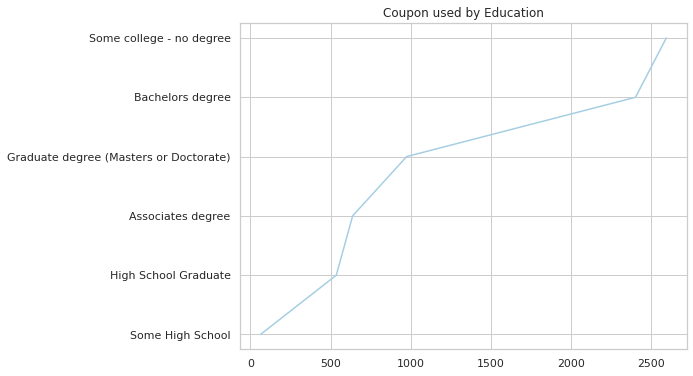

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(y=target_yes['education'].value_counts().to_dict().keys(),x=target_yes['education'].value_counts().to_dict().values())

plt.title('Coupon used by Education')

Text(0.5, 1.0, 'Age Values Count')

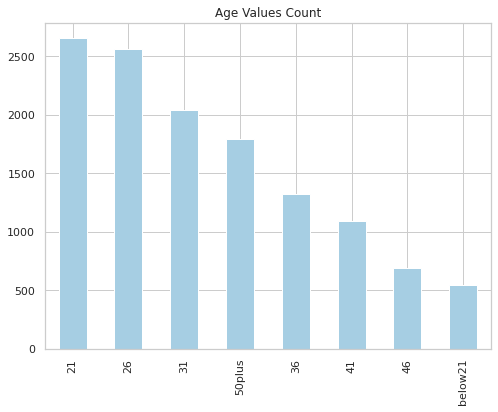

In [ ]:
plt.figure(figsize=(8,6))

vehicle_df.age.value_counts().plot(kind='bar')
plt.title('Age Values Count')

Text(0.5, 1.0, 'Coupon used by Age')

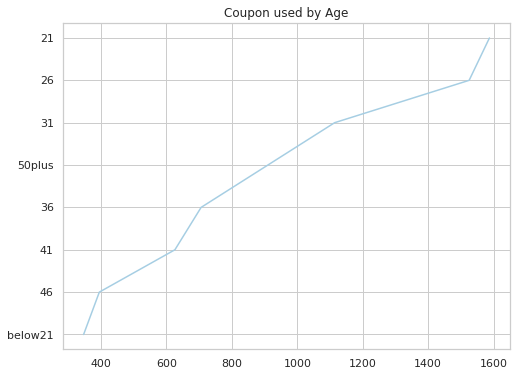

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(y=target_yes['age'].value_counts().to_dict().keys(),x=target_yes['age'].value_counts().to_dict().values())

plt.title('Coupon used by Age')

Text(0.5, 1.0, 'Gender Value Counts')

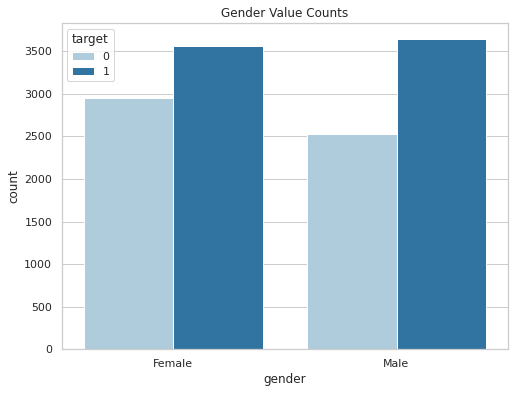

In [ ]:
plt.figure(figsize = (8,6))

sns.countplot(x='gender',data=vehicle_df,hue='target')
plt.title("Gender Value Counts")

Text(0.5, 1.0, 'Marital Status Value Counts')

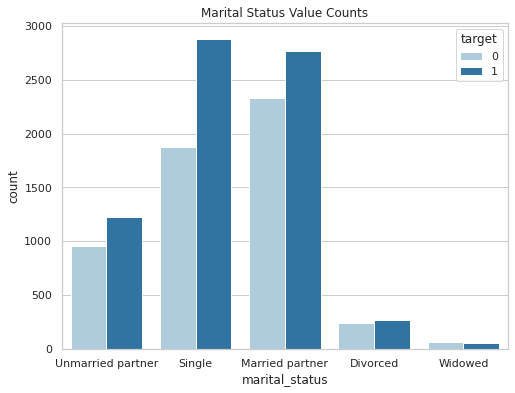

In [ ]:
plt.figure(figsize = (8,6))

sns.countplot(x='marital_status',data=vehicle_df,hue='target')
plt.title("Marital Status Value Counts")

Text(0.5, 1.0, 'Income Value Counts')

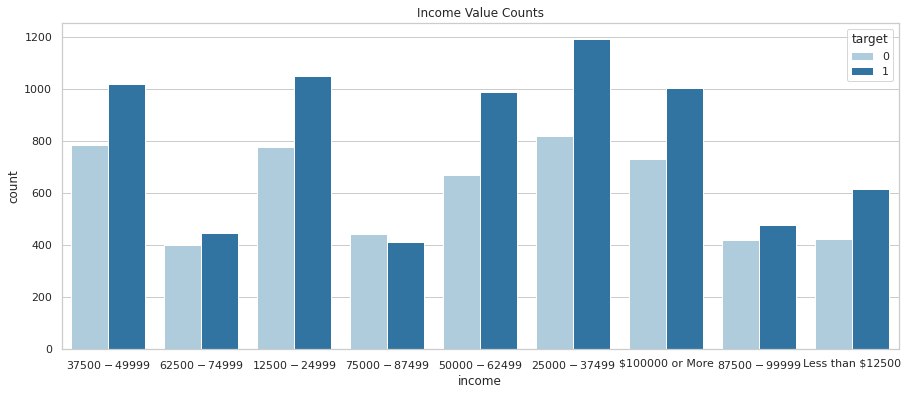

In [ ]:
plt.figure(figsize = (15,6))

sns.countplot(x='income',data=vehicle_df,hue='target')
plt.title("Income Value Counts")

In [ ]:
# Let's look at our columns with missing values
import missingno as msno

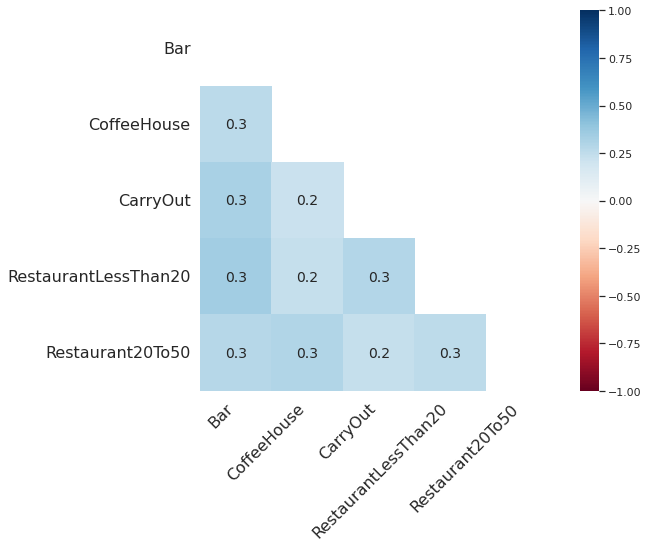

In [ ]:
na_cols = ['Bar', 'CoffeeHouse', 'CarryOut', 'RestaurantLessThan20', 'Restaurant20To50']
na_df = vehicle_df[na_cols]
msno.heatmap(na_df, figsize=(8, 7))
plt.show()

In [ ]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   marital_status        12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [10]:
# change columns from object type to category
for x in vehicle_df.columns[vehicle_df.isna().any()]:
    vehicle_df = vehicle_df.fillna({x: vehicle_df[x].value_counts().idxmax()})

In [11]:
obj_df = vehicle_df.select_dtypes(include=['object']).copy()

for col in obj_df.columns:
    vehicle_df[col]=vehicle_df[col].astype('category')
    
vehicle_df.dtypes

destination             category
passenger               category
weather                 category
temperature                int64
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
marital_status          category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryOut                category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
target                     int64
dtype: object

In [12]:
vehicle_df['temperature'] = vehicle_df['temperature'].astype('category')

In [14]:
from sklearn.preprocessing import  OneHotEncoder

enc = OneHotEncoder(dtype='int64')

cat_df = vehicle_df.select_dtypes(include=['category']).copy()
int_df = vehicle_df.select_dtypes(include=['int64']).copy()

enc_df = pd.DataFrame()
for col in cat_df.columns:
    enc_results = enc.fit_transform(cat_df[[col]])
    df0 = pd.DataFrame(enc_results.toarray(), columns=enc.categories_)
    enc_df = pd.concat([enc_df,df0], axis=1)
    
final_df = pd.concat([enc_df, int_df], axis=1)

In [ ]:
final_df.head()

In [16]:
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
X = final_df.drop(columns=['target'])
y = final_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
y_train.shape

(9513,)

In [ ]:
X_test.shape

(3171, 109)

In [18]:
def trainWithoutTuning(model):
  model.fit(X_train, y_train)
  y_pred = cross_val_predict(model, X_test, y_test, cv=StratifiedKFold(n_splits=10)) 
  f1_score(y_test, y_pred, average='binary') 
  print(model)
  print(classification_report(y_test, y_pred))
  print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

In [22]:
def tuning(model,params):
  search = GridSearchCV(estimator=model,
                      param_grid=params,
                      cv=10,
                      return_train_score=True,
                      n_jobs=-1,refit=True)
  search.fit(X_train, y_train)
  print(model)
  print ("Best score is: ",search.best_score_)
  print ("Best parameters are: ",search.best_params_)
  print ("Best estimator is: ", search.best_estimator_)
  return search.best_estimator_

In [33]:
def result(model):
  y_pred_grid =model.predict(X_test)
  print(classification_report(y_test, y_pred_grid))
  print('Accuracy {} %'.format(100 * accuracy_score(y_pred_grid, y_test)))
# calculate roc curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_grid)
  auc = roc_auc_score(y_test, y_pred_grid)
  print('AUC: %.3f' % auc)

#Plot AUC curve
  pyplot.plot(fpr, tpr, marker='.', label=model)
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
# show the legend
  pyplot.legend()
# show the plot
  pyplot.show()


In [19]:
trainWithoutTuning(RandomForestClassifier())

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.73      0.65      0.68      1398
           1       0.74      0.81      0.78      1773

    accuracy                           0.74      3171
   macro avg       0.74      0.73      0.73      3171
weighted avg       0.74      0.74      0.74      3171

Accuracy 73.8252917060864 %


In [23]:
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
finalmodel=tuning(RandomForestClassifier(),params)

RandomForestClassifier()
Best score is:  0.7158630013519603
Best parameters are:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Best estimator is:  RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)


              precision    recall  f1-score   support

           0       0.76      0.52      0.62      1398
           1       0.70      0.87      0.77      1773

    accuracy                           0.72      3171
   macro avg       0.73      0.70      0.70      3171
weighted avg       0.72      0.72      0.71      3171

Accuracy 71.61778618732261 %
AUC: 0.696


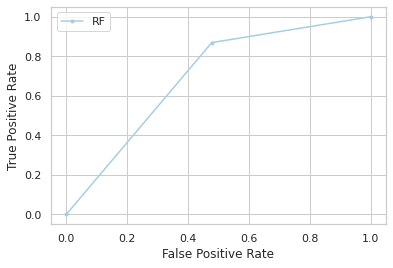

In [29]:
result(finalmodel)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.61      0.57      0.58      1398
           1       0.67      0.71      0.69      1773

    accuracy                           0.65      3171
   macro avg       0.64      0.64      0.64      3171
weighted avg       0.64      0.65      0.64      3171

Accuracy 64.61684011352885 %
KNeighborsClassifier()
Best score is:  0.6887426106089124
Best parameters are:  {'metric': 'euclidean', 'n_neighbors': 17, 'p': 1}
Best estimator is:  KNeighborsClassifier(metric='euclidean', n_neighbors=17, p=1)
              precision    recall  f1-score   support

           0       0.69      0.56      0.62      1398
           1       0.70      0.80      0.74      1773

    accuracy                           0.69      3171
   macro avg       0.69      0.68      0.68      3171
weighted avg       0.69      0.69      0.69      3171

Accuracy 69.31567328918322 %
AUC: 0.679


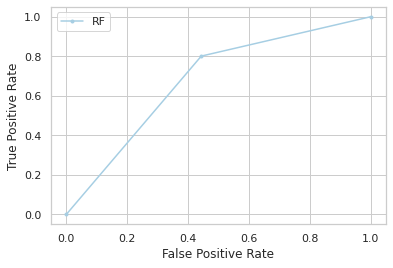

In [32]:
trainWithoutTuning(KNeighborsClassifier())
params = {"n_neighbors": [3,7,11,15,17],'p':[1,2],'metric': ['euclidean','manhattan'] }

finalmodel=tuning(KNeighborsClassifier(),params)
result(finalmodel)

SVC()
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1398
           1       0.74      0.80      0.77      1773

    accuracy                           0.73      3171
   macro avg       0.73      0.72      0.73      3171
weighted avg       0.73      0.73      0.73      3171

Accuracy 73.28918322295806 %
SVC()
Best score is:  0.7627505102987567
Best parameters are:  {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator is:  SVC(C=4, gamma=0.1)
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1398
           1       0.78      0.82      0.80      1773

    accuracy                           0.77      3171
   macro avg       0.77      0.76      0.77      3171
weighted avg       0.77      0.77      0.77      3171

Accuracy 77.1680857773573 %
AUC: 0.765


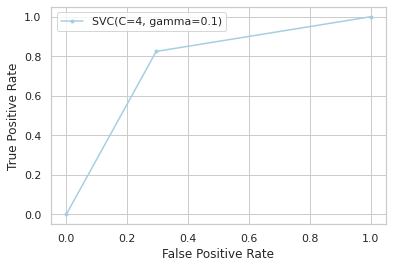

In [36]:
trainWithoutTuning(SVC())
Cs = [0.1, 1, 4]
gammas = [0.1, 1]
params = {'C': Cs, 'gamma' : gammas, 'kernel': ['rbf','linear']}
finalmodel=tuning(SVC(),params)
result(finalmodel)